Launch Site Details

Launch Rail Length: 5.2  m
Launch Date: 2023-10-01 12:00:00 UTC
Launch Site Latitude: 40.63137°
Launch Site Longitude: -8.65997°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 21226.81 W    4513263.92 N
Launch Site UTM zone: 30T
Launch Site Surface Elevation: 50.4 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 78.885 km
Forecast Time Period: From  2023-09-30 00:00:00  to  2023-10-16 00:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 4.61 m/s
Surface Wind Direction: 222.38°
Surface Wind Heading: 42.38°
Surface Pressure: 1000.00 hPa
Surface Temperature: 301.98 K
Surface Air Density: 1.154 kg/m³
Surface Speed of Sound: 348.36 m/s


Atmospheric Model Plots


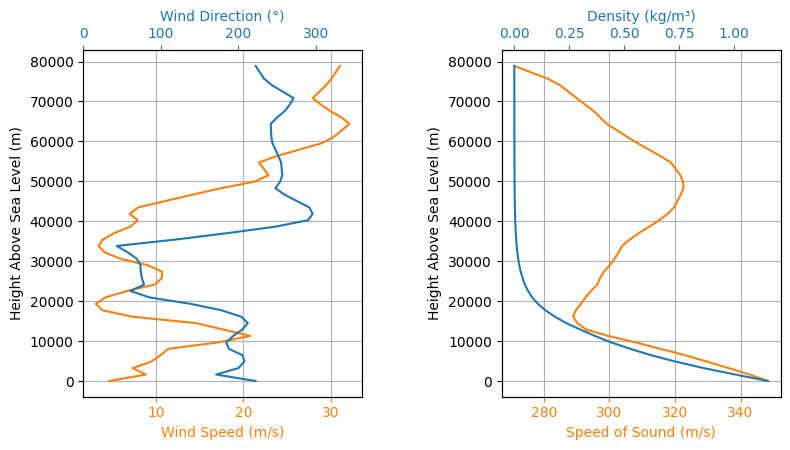

In [1]:
from rocketpy import Environment, SolidMotor, Rocket, Flight

Env = Environment(
    railLength=5.2, latitude=40.631375, longitude=-8.659969, elevation=0,
)
import datetime
tomorrow = datetime.date.today() + datetime.timedelta(days=1)

Env.setDate((tomorrow.year, tomorrow.month, tomorrow.day, 12,))
Env.setAtmosphericModel(type="Forecast",file="GFS")
Env.info()




Motor Details
Total Burning Time: 12.76 s
Total Propellant Mass: 2.365 kg
Propellant Exhaust Velocity: 4284.971 m/s
Average Thrust: 794.106 N
Maximum Thrust: 1722.0 N at 0.245 s after ignition.
Total Impulse: 10132.798 Ns

Plots


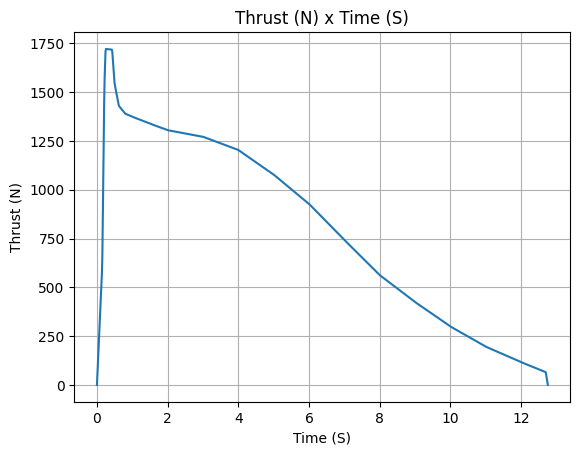

In [2]:
Cesaroni10133M795P = SolidMotor(
    thrustSource="desktop/RocketPy/Cesaroni_10133M795-P.eng",
    burnOut=12.76,
    grainNumber=4,
    grainSeparation=0.005,
    grainDensity=1815,
    grainOuterRadius=0.033,
    grainInitialInnerRadius=0.015,
    grainInitialHeight=0.120,
    throatRadius=0.025,
    nozzleRadius=0.075,
    reshapeThrustCurve=False,
    interpolationMethod="linear",
)
Cesaroni10133M795P.info()
    

In [3]:
Uart = Rocket(
    motor=Cesaroni10133M795P,
    radius=0.078,
    mass=29.829,
    inertiaI=6.60,
    inertiaZ=0.0351,
    distanceRocketNozzle=-1.05,
    distanceRocketPropellant=-0.64,
    powerOffDrag="desktop/RocketPy/data/calisto/powerOffDragCurve.csv",
    powerOnDrag="desktop/RocketPy/data/calisto/powerOnDragCurve.csv",
)
Uart.setRailButtons([0.2, -0.5])

Inertia Details
Rocket Mass: 29.829 kg (No Propellant)
Rocket Mass: 32.194 kg (With Propellant)
Rocket Inertia I: 6.600 kg*m2
Rocket Inertia Z: 0.035 kg*m2

Geometrical Parameters
Rocket Maximum Radius: 0.078 m
Rocket Frontal Area: 0.019113 m2

Rocket Distances
Rocket Center of Mass - Nozzle Exit Distance: -1.05 m
Rocket Center of Mass - Motor reference point: -0.64 m
Rocket Center of Mass - Rocket Loaded Center of Mass: -0.047 m

Aerodynamic Components Parameters
Currently not implemented.

Aerodynamics Lift Coefficient Derivatives
Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 4.342/rad
Tail Lift Coefficient Derivative: -0.703/rad

Aerodynamics Center of Pressure
Nose Cone Center of Pressure to CM: 1.032 m
Fins Center of Pressure to CM: -1.084 m
Tail Center of Pressure to CM: -1.242 m
Distance - Center of Pressure to CM: -0.314 m
Initial Static Margin: 1.709 c
Final Static Margin: 2.010 c

Mass Plots


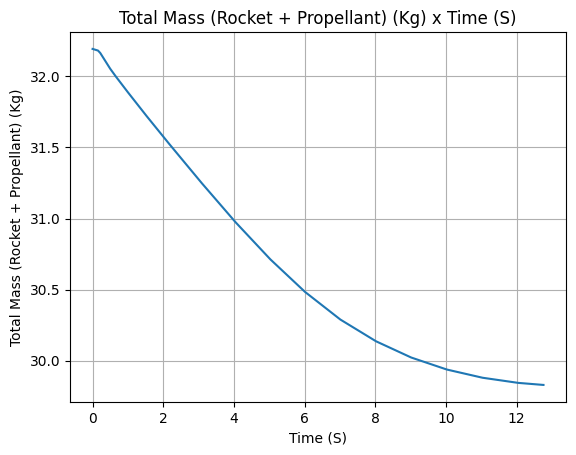

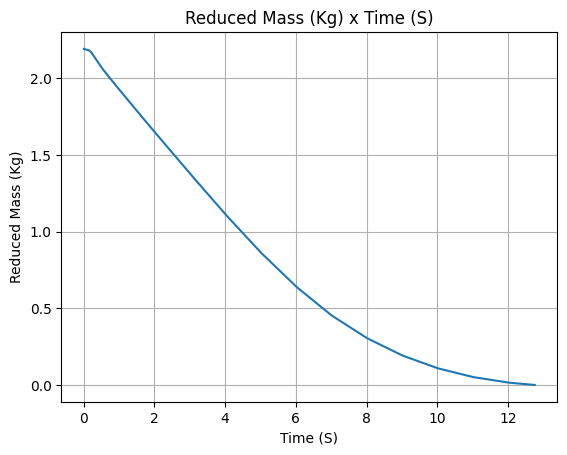


Aerodynamics Plots


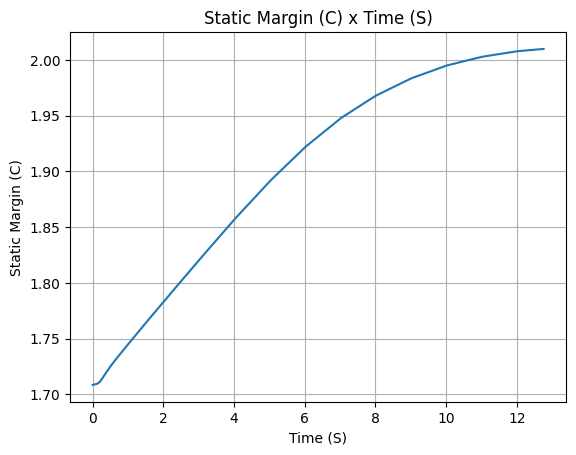

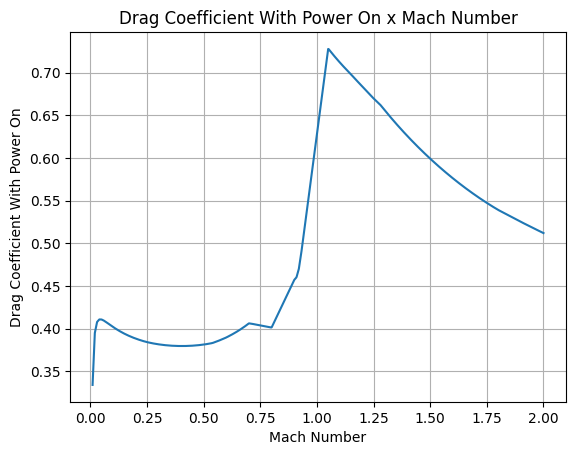

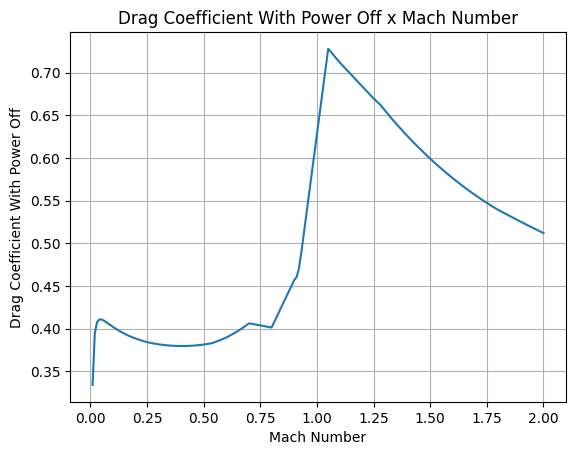

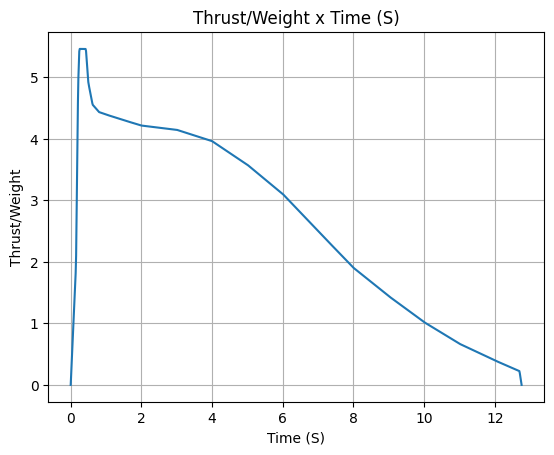

In [4]:
NoseCone = Uart.addNose(length=0.21, kind="von karman", distanceToCM=0.927,)
FinSet = Uart.addTrapezoidalFins(
    n=3,
    rootChord=0.222,
    tipChord=0.20,
    span=0.116,
    distanceToCM=-1.02,
    cantAngle=0,
    radius=None,
    airfoil=None,
)
Tail = Uart.addTail(
   topRadius=0.0635, bottomRadius=0.0435, length=0.100, distanceToCM=-1.194656
)
Uart.allInfo()

In [5]:
def drogueTrigger(p,y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate drogue when vz < 0 m/s.
    return True if y[5] < 0 else False

def mainTrigger(p,y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate main when vz < 0 m/s and z < 800 
    return True if y[5] < 0 and y[2] < 800  else False

Main = Uart.addParachute(
    "Main",
    CdS=10.0,
    trigger=mainTrigger,
    samplingRate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)
Drogue = Uart.addParachute(
    "Drogue",
    CdS=1.0,
    trigger=drogueTrigger,
    samplingRate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)
#Uart.parachutes.remove(Drogue)
#Uart.parachutes.remove(Main)
# Each time we run the code it will add 2 parachutes (1 main , 1 drogue) so if we happen to run the code too many times, we can use this lines above.



Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 50.40 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Launch Rail Orientation

Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Surface Wind Conditions

Frontal Surface Wind Speed: 3.41 m/s
Lateral Surface Wind Speed: -3.11 m/s


 Rail Departure State

Rail Departure Time: 0.598 s
Rail Departure Velocity: 17.783 m/s
Rail Departure Static Margin: 1.729 c
Rail Departure Angle of Attack: 14.745°
Rail Departure Thrust-Weight Ratio: 4.619
Rail Departure Reynolds Number: 2.821e+00


BurnOut State

BurnOut time: 12.760 s
Altitude at burnOut: 1753.298 m (AGL)
Rocket velocity at burnOut: 165.624 m/s
Freestream velocity at burnOut: 165.431 m/s
Mach Number at burnOut: 0.484
Kinetic energy at burnOut: 4.091e+05 J


Apogee



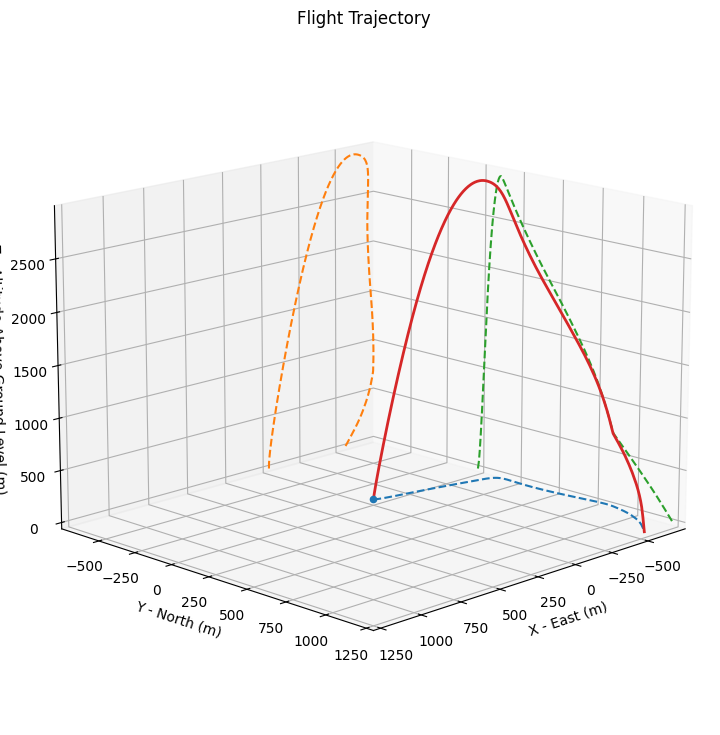



Trajectory Kinematic Plots



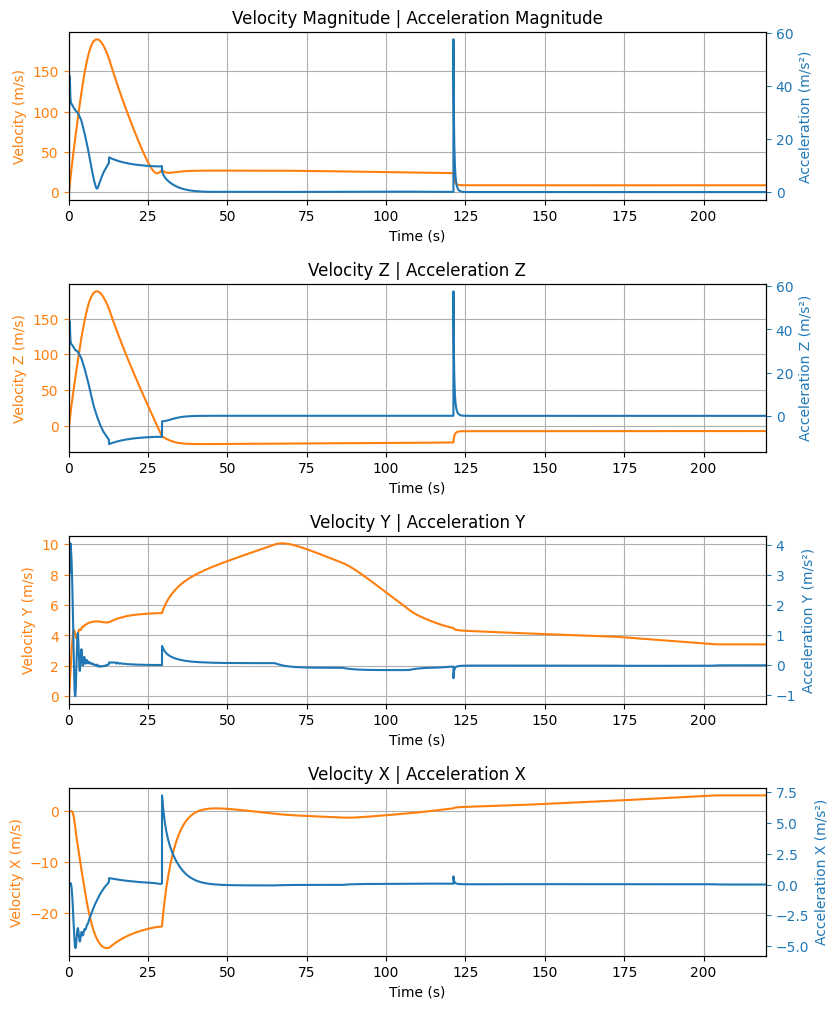



Angular Position Plots



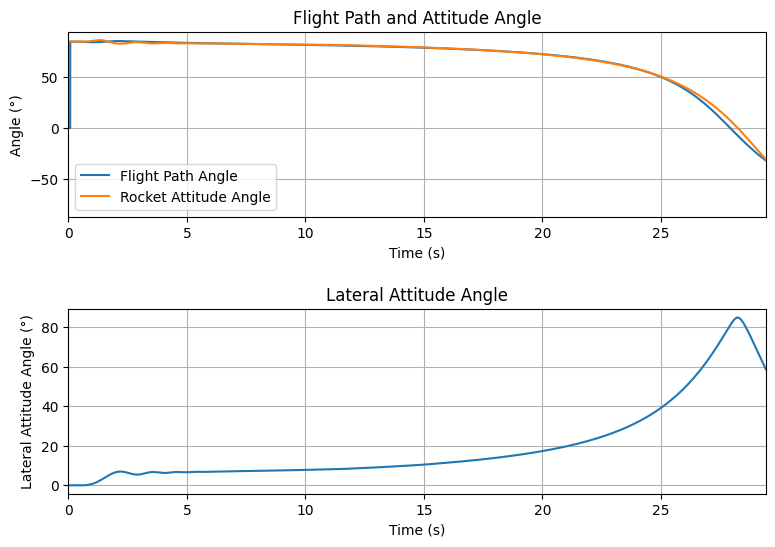



Path, Attitude and Lateral Attitude Angle plots



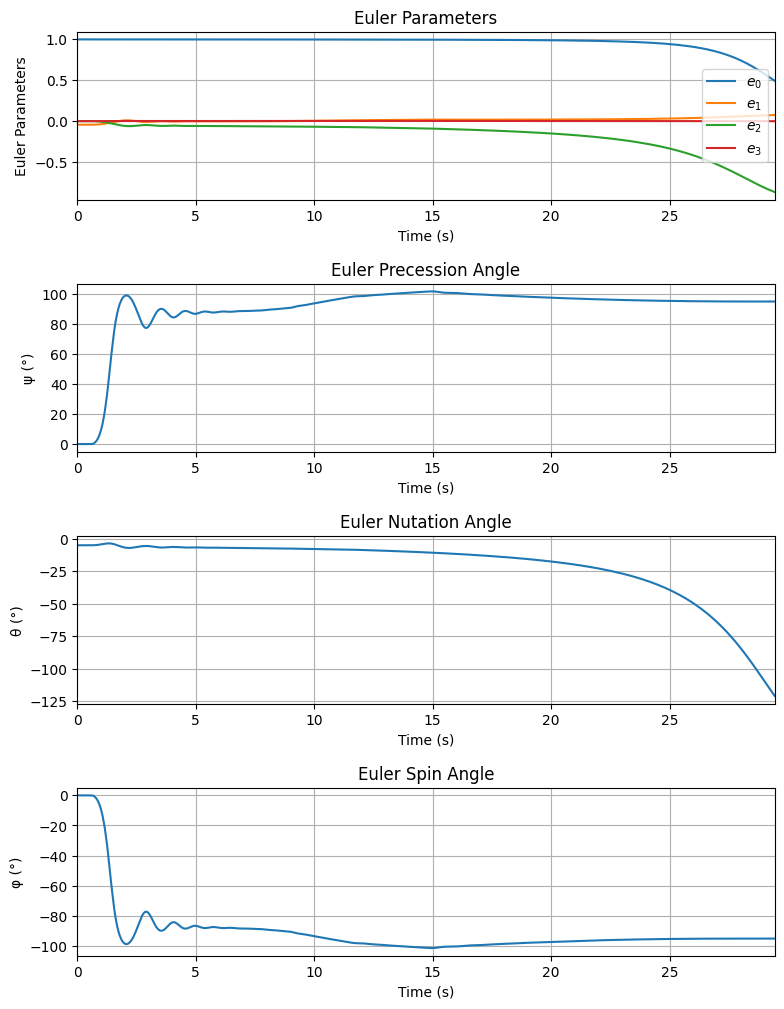



Trajectory Angular Velocity and Acceleration Plots



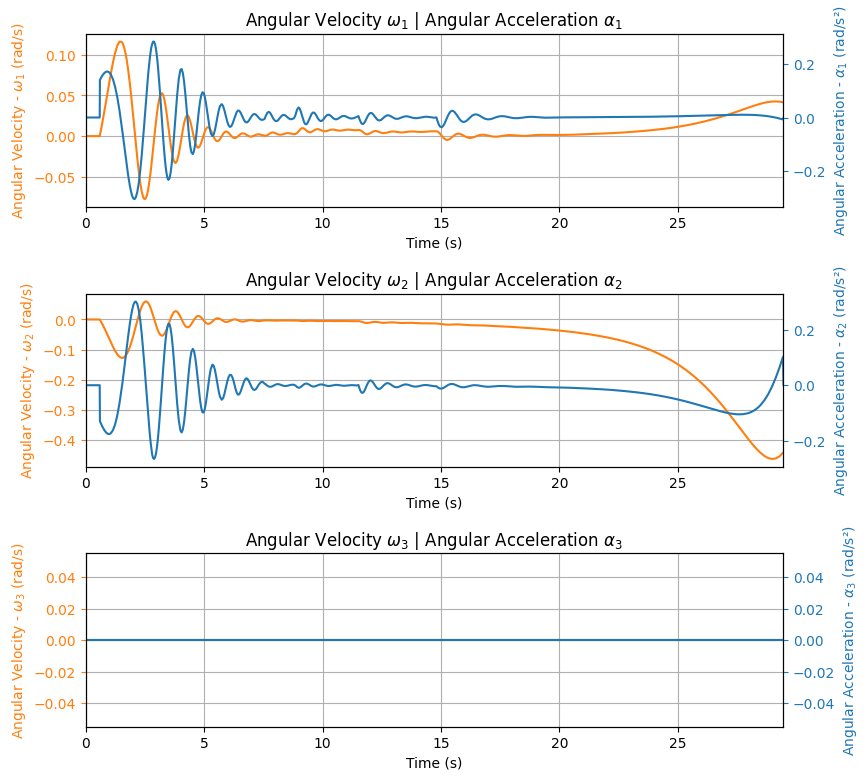



Trajectory Force Plots



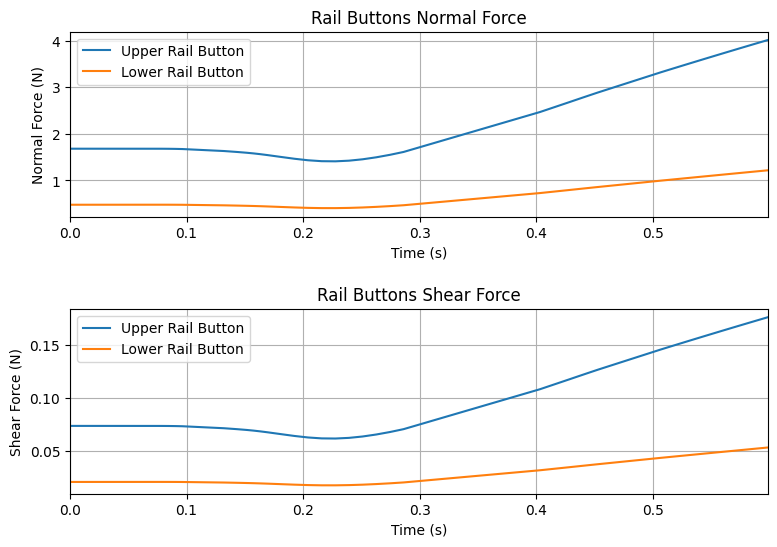

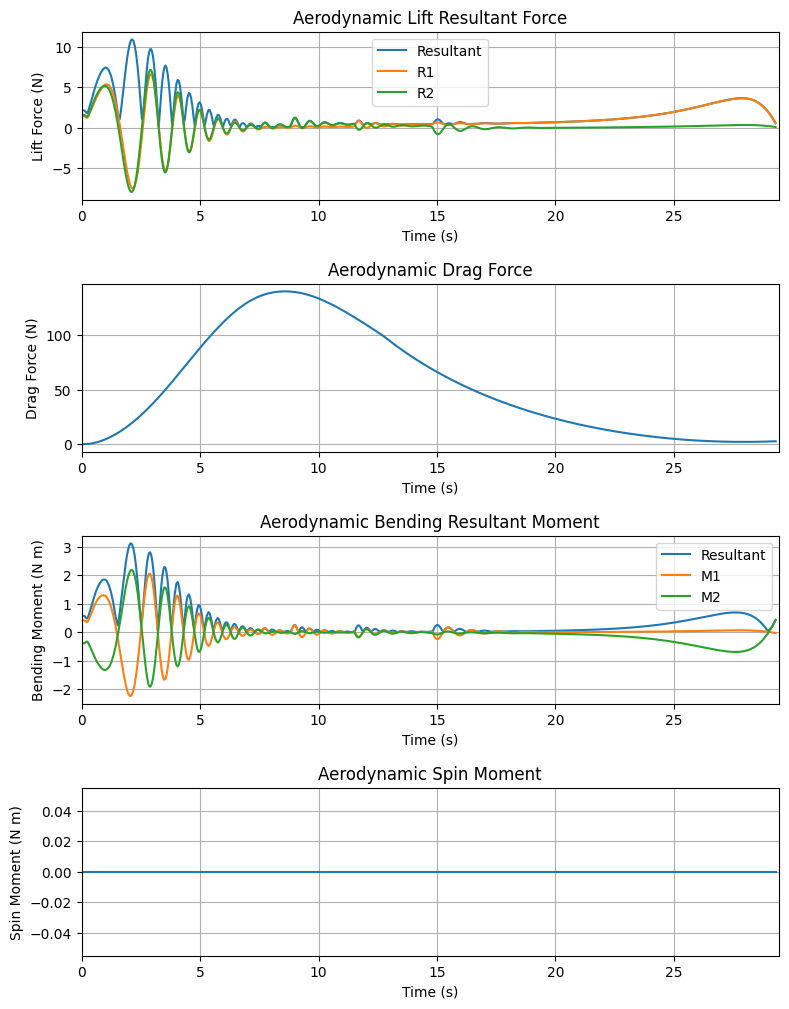



Trajectory Energy Plots



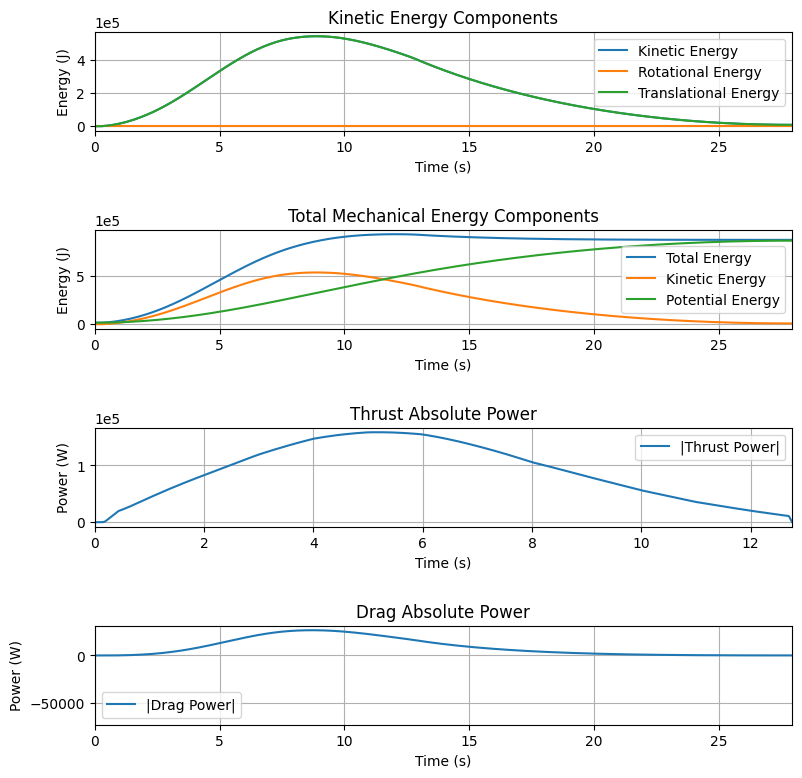



Trajectory Fluid Mechanics Plots



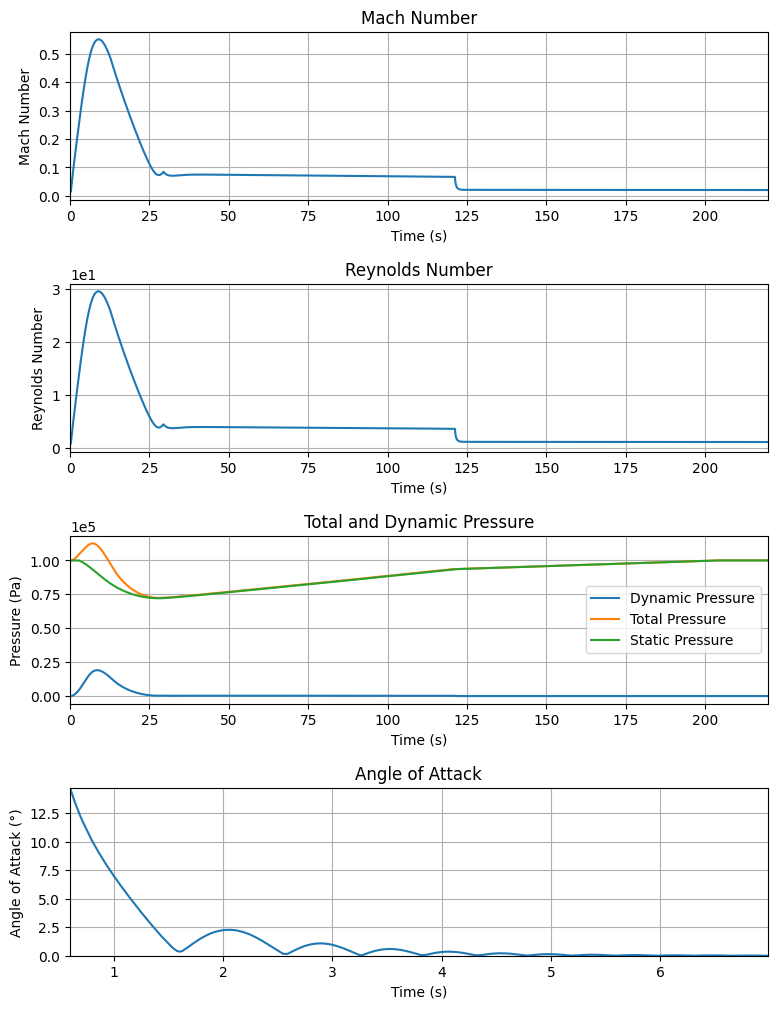



Trajectory Stability and Control Plots



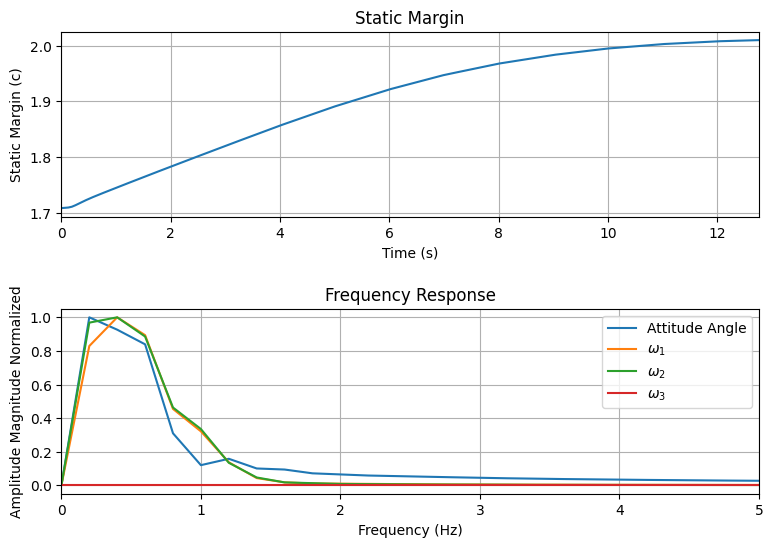

File  trajectory.kml  saved with success!


In [6]:
#Simulating a Flight 

test_flight = Flight(rocket=Uart, environment=Env, inclination=85, heading=0)

#Analyzing the results

test_flight.allInfo()

#Exports the Flight Trajectory into a .kml file.
test_flight.exportKML(
   fileName="trajectory.kml",
    extrude=True,
    altitudeMode="relativetoground",
)